In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [294]:
F_Fire_Data_Set = pd.read_csv("Algerian.csv",header=1)
F_Fire_Data_Set.tail(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [295]:
F_Fire_Data_Set.loc[:122,"Region"]=0
F_Fire_Data_Set.loc[122:,"Region"]=1
F_Fire_Data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [296]:
F_Fire_Data_Set[['Region']] = F_Fire_Data_Set[['Region']].astype(int)

In [297]:
F_Fire_Data_Set.iloc[[121]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0


In [298]:
F_Fire_Data_Set=F_Fire_Data_Set.drop(F_Fire_Data_Set.index[121]).reset_index(drop=True)

In [299]:
F_Fire_Data_Set.iloc[[121]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [300]:
F_Fire_Data_Set = F_Fire_Data_Set.drop(F_Fire_Data_Set.index[121])

In [301]:
F_Fire_Data_Set.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [302]:
F_Fire_Data_Set.columns = F_Fire_Data_Set.columns.str.strip()

In [303]:
F_Fire_Data_Set = F_Fire_Data_Set[F_Fire_Data_Set['month'] != 'month'].reset_index(drop=True)

In [304]:
F_Fire_Data_Set[['month','day','year','Temperature','RH','Ws']]=F_Fire_Data_Set[['month','day','year','Temperature','RH','Ws']].astype(int)

In [305]:
Objects = [Features for Features in F_Fire_Data_Set.columns if F_Fire_Data_Set[Features].dtypes == 'O']

In [306]:
for i in Objects:
  if i != 'Classes':
    F_Fire_Data_Set[i] = pd.to_numeric(F_Fire_Data_Set[i], errors='coerce')

In [307]:
F_Fire_Data_Set.dtypes

,0
day,int64
month,int64
year,int64
Temperature,int64
RH,int64
Ws,int64
Rain,float64
FFMC,float64
DMC,float64
DC,float64


In [308]:
F_Fire_Data_Set.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,242.000000,243.000000,243.000000,242.000000,242,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN
mean,15.695473,7.493827,2012.0,32.201646,61.872428,15.510288,0.758025,78.023045,14.725926,49.604132,4.793004,16.723457,7.064050,NaN,0.502058
std,8.795534,1.111065,0.0,3.611917,14.878995,2.814311,2.003109,14.210122,12.366224,47.687649,4.173548,14.204454,7.442537,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.450000,5.800000,14.325000,1.400000,6.050000,0.725000,NaN,0.000000
50%,16.000000,7.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.250000,3.500000,12.400000,4.450000,NaN,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.000000,17.000000,0.500000,88.300000,20.800000,70.050000,7.300000,22.650000,11.525000,NaN,1.000000


In [309]:
## Let Save the cleaned dataset
F_Fire_Data_Set.to_csv('Algerian_Clean_Data.csv')

In [310]:
F_Fire_Data_Set_Copy = F_Fire_Data_Set.copy()

In [311]:
## drop day,month and year
F_Fire_Data_Set_Copy.drop(['month','day','year'],axis=1,inplace=True)

In [312]:
## categories in classes
F_Fire_Data_Set_Copy['Classes'].value_counts(ascending=False)

,count
Classes,
fire,131
not fire,100
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [313]:
## Encoding of the categories in classes
F_Fire_Data_Set_Copy['Classes'] = np.where(F_Fire_Data_Set_Copy['Classes'].str.contains('not fire'),0,1)

In [314]:
F_Fire_Data_Set_Copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


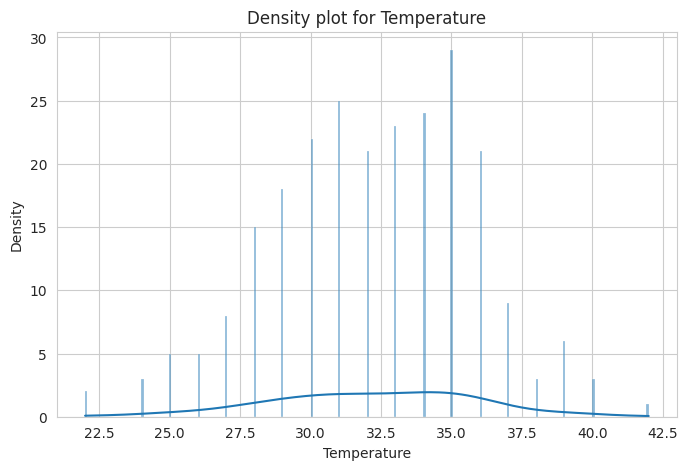

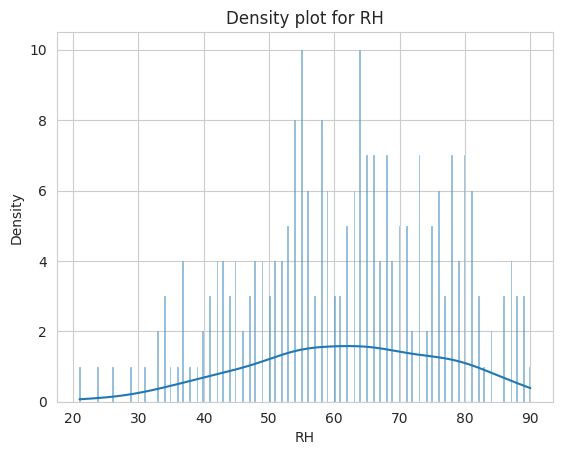

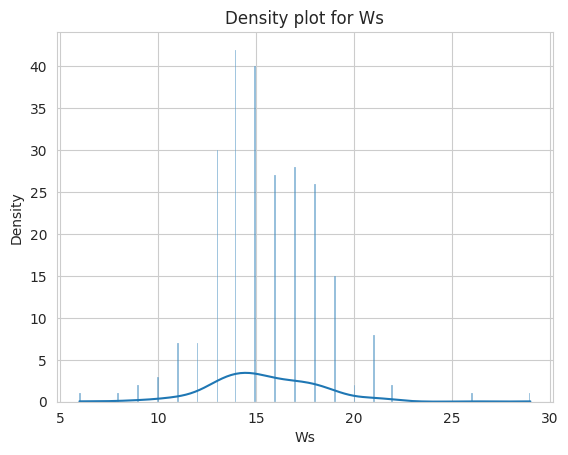

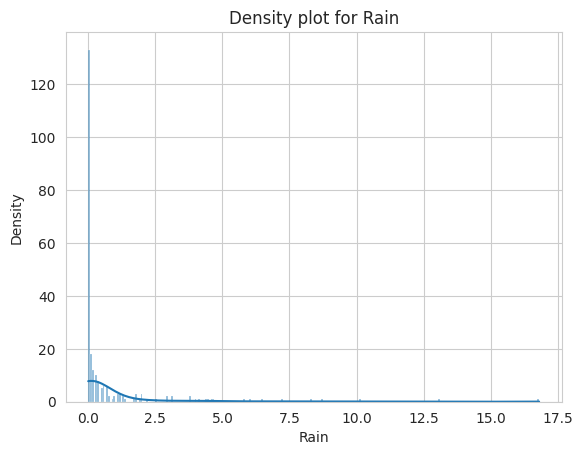

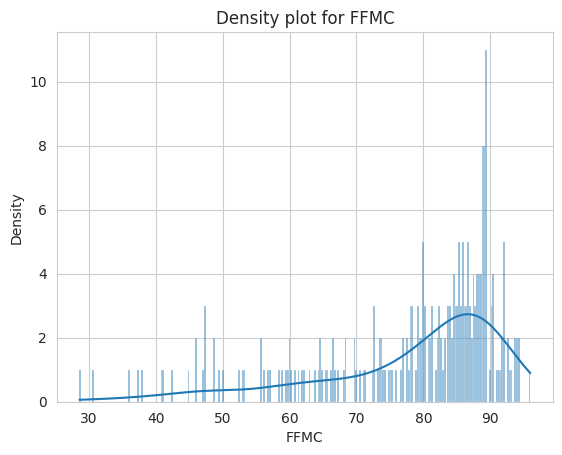

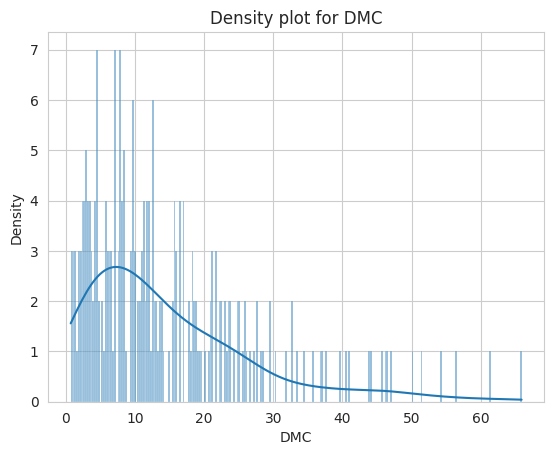

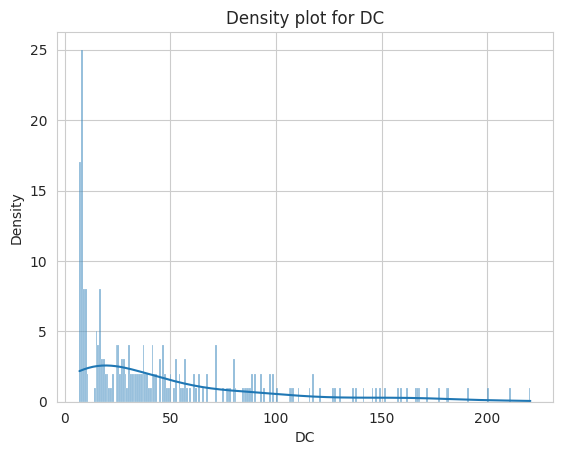

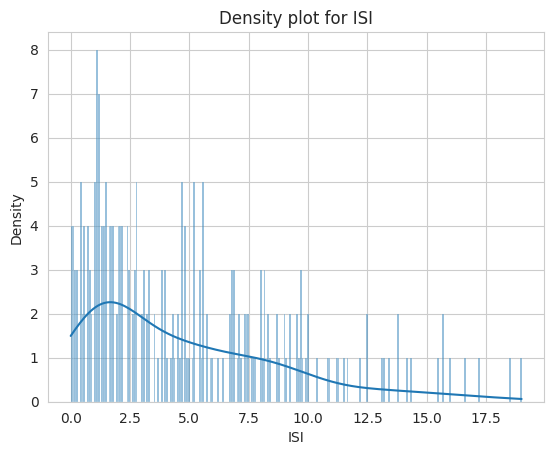

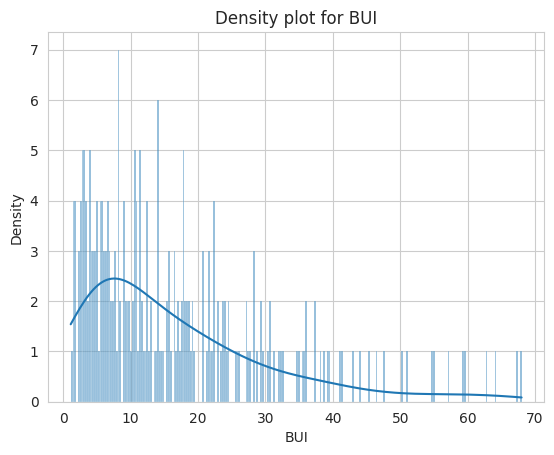

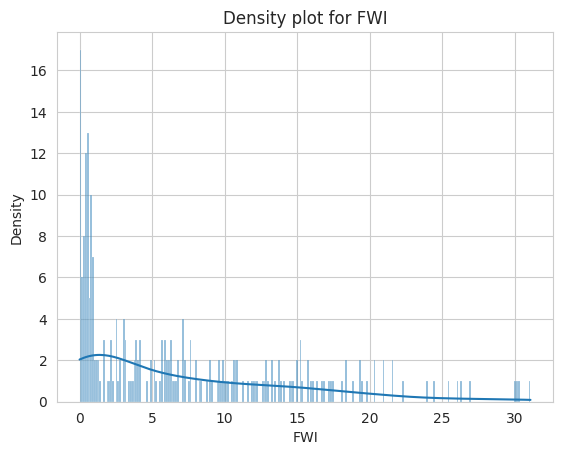

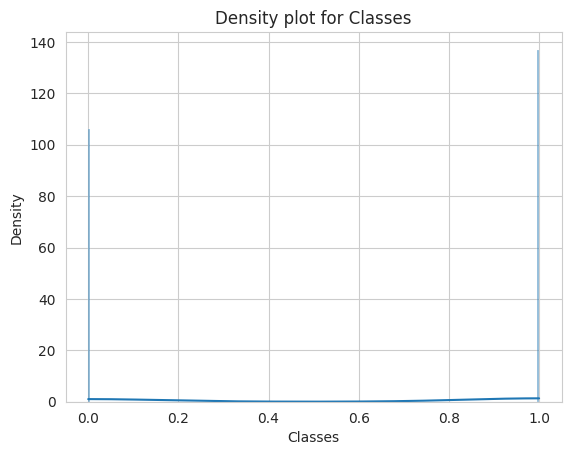

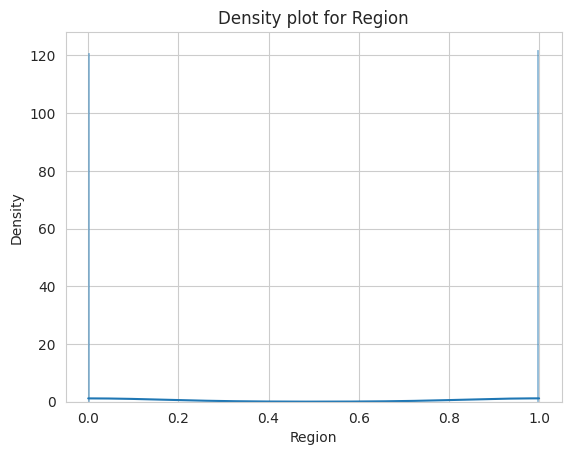

In [315]:
## Plot desnity plot for all features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
for column in F_Fire_Data_Set_Copy.columns:
    sns.histplot(F_Fire_Data_Set_Copy[column], bins=250, kde=True)
    plt.title(f'Density plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

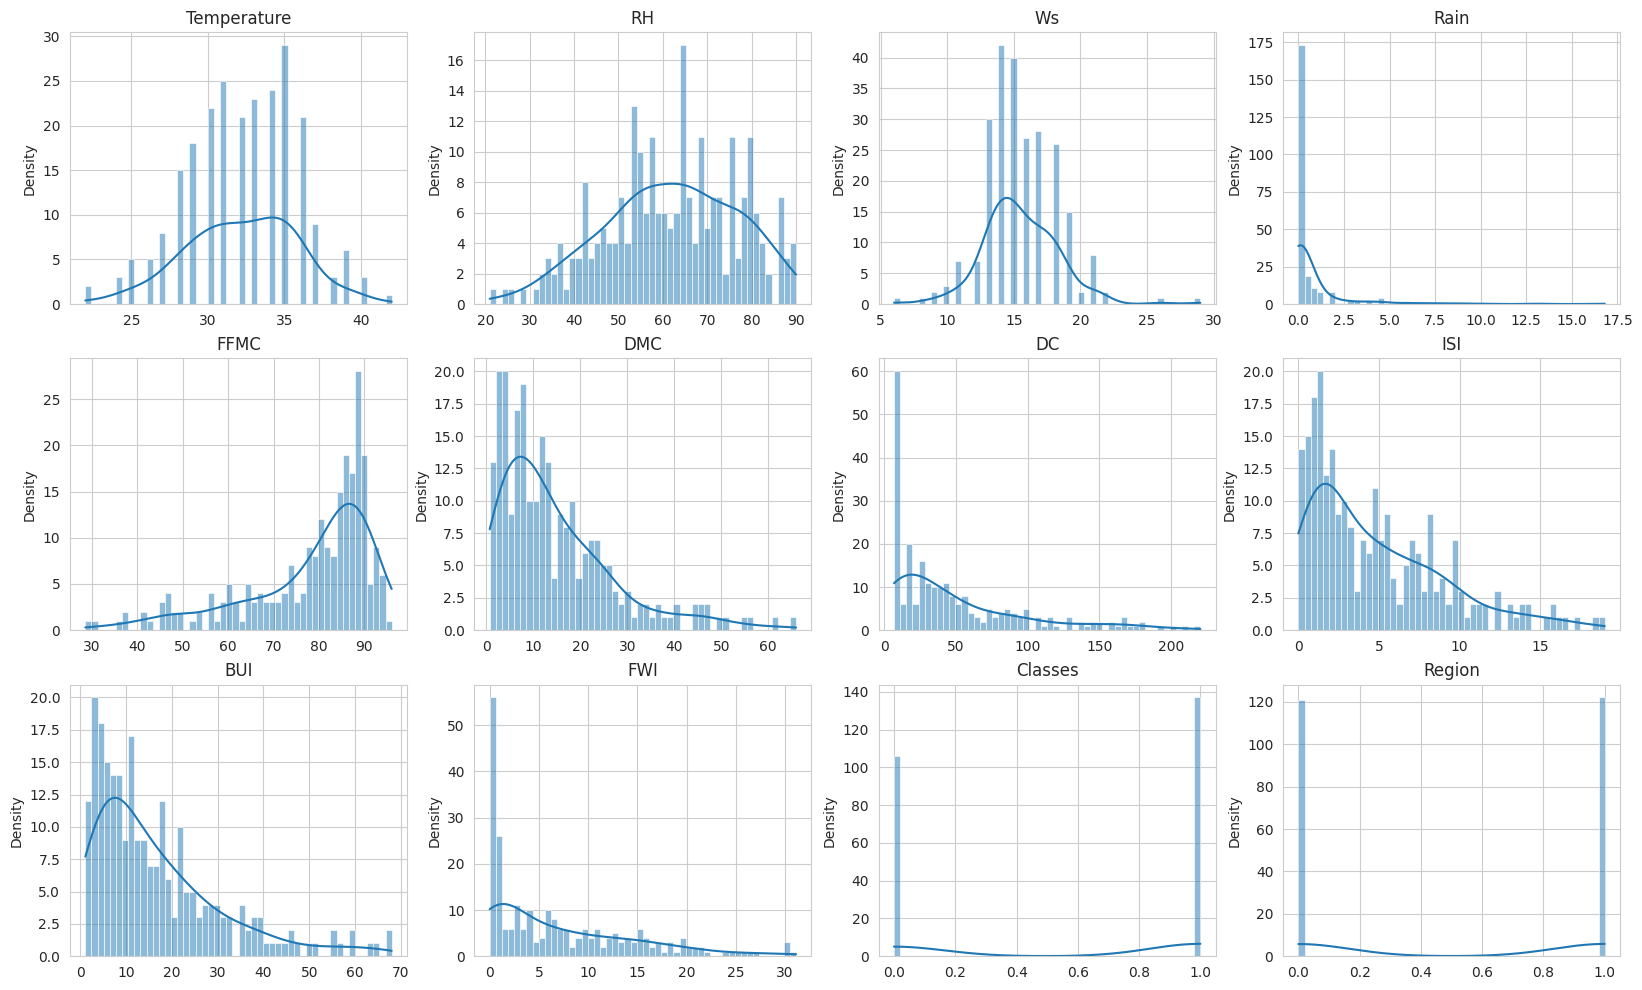

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all column names (optionally, only numeric)
columns = F_Fire_Data_Set_Copy.select_dtypes(include='number').columns

# Define grid size
num_cols = 4
num_features = len(columns)
num_rows = math.ceil(num_features / num_cols)

# Set figure size (adjust height if you have many features)
plt.figure(figsize=(20, num_rows * 4))

# Loop through each feature and create subplots
for idx, column in enumerate(columns, 1):
    plt.subplot(num_rows, num_cols, idx)
    sns.histplot(F_Fire_Data_Set_Copy[column], bins=50, kde=True)
    plt.title(f'{column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Density')

plt.show()

In [317]:
CleanDataSet = F_Fire_Data_Set_Copy

In [318]:
CleanDataSet.dropna(axis=0,inplace=True)

In [319]:
CleanDataSet.isnull().sum()

,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0
ISI,0
BUI,0
FWI,0


In [320]:
CleanDataSet.head(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [321]:
#Convert class column into percentage
Percentage = CleanDataSet['Classes'].value_counts(normalize=True)*100
print(Percentage)

Classes
1    56.61157
0    43.38843
Name: proportion, dtype: float64


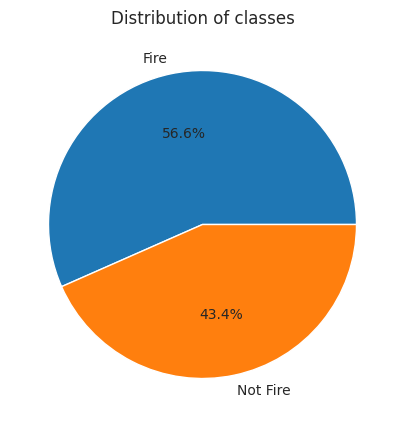

In [322]:
# plotting piechart on classes column
Class_Lables = ['Fire','Not Fire']
plt.figure(figsize=(8,5))
plt.pie(Percentage,labels=Class_Lables,autopct='%1.1f%%')
plt.title("Distribution of classes")
plt.show()

In [323]:
#Correlation
CleanDataSet.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.649404,-0.291385,-0.326603,0.670543,0.482212,0.372699,0.601275,0.456215,0.564627,0.512241,0.264101
RH,-0.649404,1.000000,0.247160,0.221515,-0.643212,-0.405784,-0.223910,-0.685130,-0.350933,-0.579230,-0.429272,-0.400024
Ws,-0.291385,0.247160,1.000000,0.172344,-0.173592,-0.003003,0.077365,0.006140,0.029303,0.030385,-0.072702,-0.183835
Rain,-0.326603,0.221515,0.172344,1.000000,-0.546977,-0.288109,-0.297402,-0.346975,-0.299216,-0.323844,-0.378692,-0.038789
FFMC,0.670543,-0.643212,-0.173592,-0.546977,1.000000,0.601704,0.505368,0.739520,0.590144,0.691065,0.769157,0.215596
DMC,0.482212,-0.405784,-0.003003,-0.288109,0.601704,1.000000,0.875498,0.678958,0.982173,0.875385,0.583649,0.188639
DC,0.372699,-0.223910,0.077365,-0.297402,0.505368,0.875498,1.000000,0.506723,0.941806,0.738636,0.509160,-0.082664
ISI,0.601275,-0.685130,0.006140,-0.346975,0.739520,0.678958,0.506723,1.000000,0.642474,0.922618,0.733830,0.259865
BUI,0.456215,-0.350933,0.029303,-0.299216,0.590144,0.982173,0.941806,0.642474,1.000000,0.857429,0.584697,0.085621
FWI,0.564627,-0.579230,0.030385,-0.323844,0.691065,0.875385,0.738636,0.922618,0.857429,1.000000,0.718040,0.194006


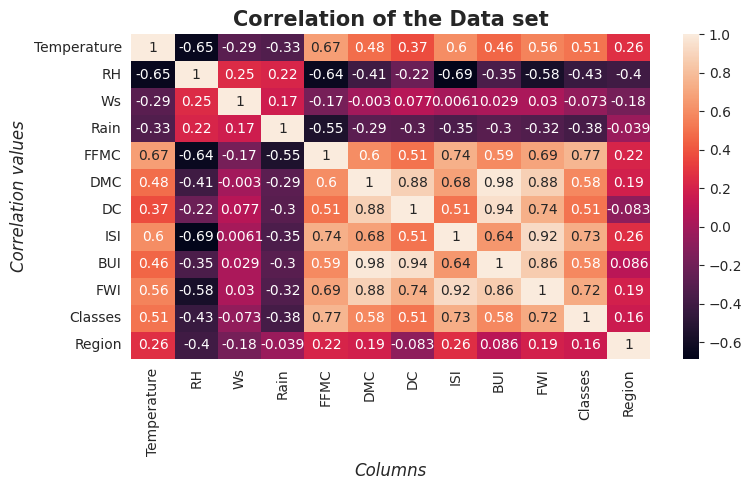

In [324]:
plt.figure(figsize=(8,5))
sns.heatmap(CleanDataSet.corr(),annot=True)
plt.title("Correlation of the Data set",fontweight='bold',fontsize=15)
plt.xlabel("Columns",fontsize=12,fontstyle='italic')
plt.ylabel("Correlation values",fontsize=12,fontstyle='italic')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [325]:
#Corelation greater than  0.5
def Co_Relation(Dataset,threshsold):
  col_corr = set()
  corr_matrix = CleanDataSet.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshsold:
        Column_Name = corr_matrix.columns[i]
        col_corr.add(Column_Name)
  return col_corr

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.1'),
  Text(2, 0, '0.2'),
  Text(3, 0, '0.3'),
  Text(4, 0, '0.4'),
  Text(5, 0, '0.5'),
  Text(6, 0, '0.6'),
  Text(7, 0, '0.7'),
  Text(8, 0, '0.8'),
  Text(9, 0, '0.9'),
  Text(10, 0, '1.0'),
  Text(11, 0, '1.2'),
  Text(12, 0, '1.3'),
  Text(13, 0, '1.4'),
  Text(14, 0, '1.8'),
  Text(15, 0, '2.5'),
  Text(16, 0, '3.1'),
  Text(17, 0, '3.8'),
  Text(18, 0, '4.6'),
  Text(19, 0, '5.8'),
  Text(20, 0, '7.2'),
  Text(21, 0, '8.3'),
  Text(22, 0, '10.1'),
  Text(23, 0, '13.1'),
  Text(24, 0, '16.8')])

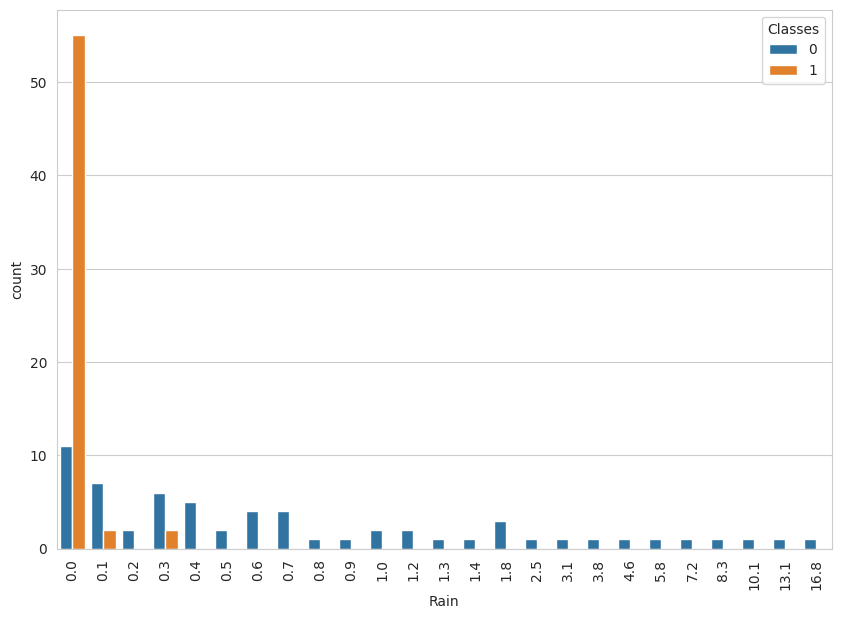

In [326]:
#Monthly Fire Analysis
Region_1_Sales = CleanDataSet.loc[CleanDataSet['Region']==0]
plt.subplots(figsize=(10,7))
sns.countplot(x='Rain',hue='Classes',data=Region_1_Sales)
plt.xticks(rotation=90)

In [327]:
X = CleanDataSet.drop('FWI',axis=1)
y =  CleanDataSet['FWI']

In [328]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [329]:
X_train.shape,X_test.shape

((181, 11), (61, 11))

<Axes: >

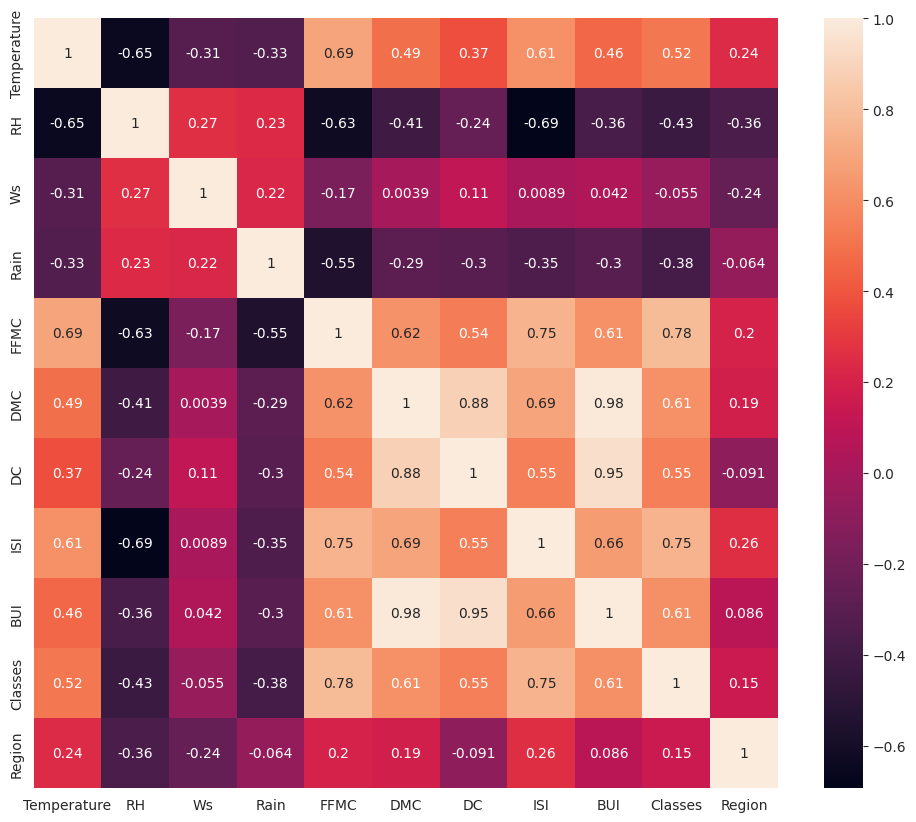

In [330]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [331]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [332]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [333]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

In [334]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

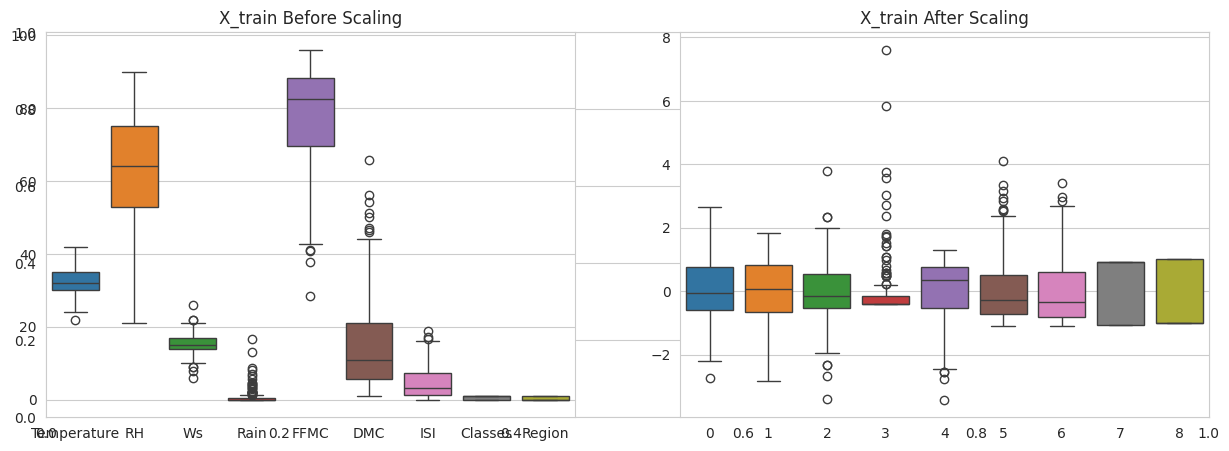

In [335]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [336]:
X_test.dropna(axis=0)
y_test.dropna(axis=0)

,FWI
24,8.4
6,7.2
152,6.4
210,5.9
238,6.5
...,...
162,9.6
178,9.0
224,3.9
230,15.4


Mean absolute error 0.5837131463619645
R2 Score 0.9834414954962315


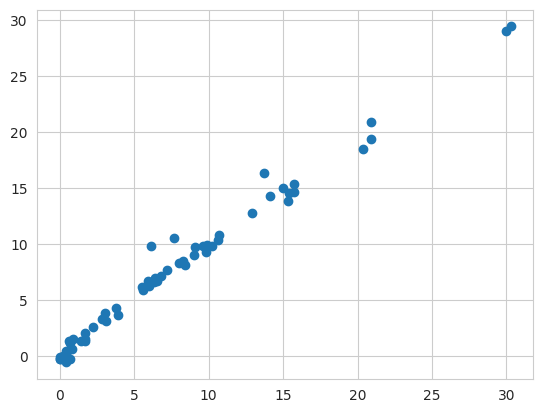

In [337]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Model = LinearRegression()
Model.fit(X_train_scaled,y_train)
y_pred = Model.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [338]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
print(f"Mean Absolute Error:{mae}")
print(f"Mean Squarred Error:{mse}")
print(f"R two Score:{R2}")

Mean Absolute Error:1.1439969561092533
Mean Squarred Error:2.4687781889985656
R two Score:0.9498970288705136


In [339]:
from sklearn.linear_model import LassoCV
LCV = LassoCV(cv=5)
LCV.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [340]:
LCV.alpha_

np.float64(0.0648070712385589)

In [341]:
LCV.alphas_

array([6.94904982, 6.48070712, 6.04392915, 5.63658856, 5.25670135,
       4.90241728, 4.57201076, 4.26387254, 3.9765018 , 3.70849889,
       3.45855847, 3.22546321, 3.00807778, 2.80534341, 2.61627265,
       2.43994463, 2.27550053, 2.12213941, 1.97911432, 1.84572863,
       1.7213327 , 1.60532064, 1.4971274 , 1.39622602, 1.30212506,
       1.21436619, 1.13252198, 1.05619378, 0.98500986, 0.91862349,
       0.85671134, 0.79897186, 0.74512384, 0.69490498, 0.64807071,
       0.60439292, 0.56365886, 0.52567014, 0.49024173, 0.45720108,
       0.42638725, 0.39765018, 0.37084989, 0.34585585, 0.32254632,
       0.30080778, 0.28053434, 0.26162727, 0.24399446, 0.22755005,
       0.21221394, 0.19791143, 0.18457286, 0.17213327, 0.16053206,
       0.14971274, 0.1396226 , 0.13021251, 0.12143662, 0.1132522 ,
       0.10561938, 0.09850099, 0.09186235, 0.08567113, 0.07989719,
       0.07451238, 0.0694905 , 0.06480707, 0.06043929, 0.05636589,
       0.05256701, 0.04902417, 0.04572011, 0.04263873, 0.03976

In [342]:
LCV.mse_path_

array([[54.85475691, 59.0920374 , 38.73458188, 78.24654444, 52.92323761],
       [48.34052069, 52.99096421, 33.41583819, 76.18591695, 47.31610928],
       [42.4938904 , 46.95120629, 28.61962842, 69.11944377, 42.42573561],
       [37.38855878, 41.62205035, 24.54075331, 62.88958083, 38.15967381],
       [32.92942963, 36.9513678 , 21.07950277, 57.39300699, 33.53098054],
       [29.03354132, 32.855712  , 18.14963853, 52.53947812, 29.1510397 ],
       [25.62862662, 29.2623056 , 15.67649734, 48.25014945, 25.35154366],
       [22.65201687, 26.10807903, 13.59554335, 43.15231356, 22.0559378 ],
       [20.04886585, 23.33765506, 11.85093707, 37.97328776, 19.19879632],
       [17.7714904 , 20.90286528, 10.39452133, 33.4518684 , 16.72199449],
       [15.77835345, 18.76169249,  9.18463246, 29.50393833, 14.57544009],
       [14.03317455, 16.87735143,  8.18533009, 26.05509494, 12.71560307],
       [12.50462289, 15.21812246,  7.36561329, 23.04279195, 11.10465788],
       [11.16511518, 13.75593446,  6.6

Mean Absolute Error: 0.6734040701477738
Mean Squarred Error 0.9501284758745885
R2 Score: 0.9807174821099025


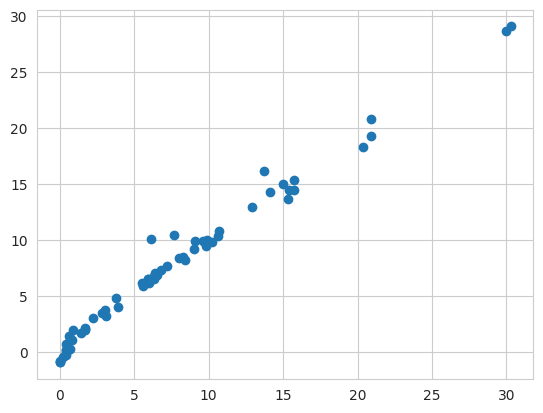

In [343]:
y_pred = LCV.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
R2Score = r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squarred Error",mse)
print("R2 Score:",R2Score)

Mean Absolute Error:0.6123074618355627
Mean Squarred Error:0.6123074618355627
R 2 Score:0.9826082263318291


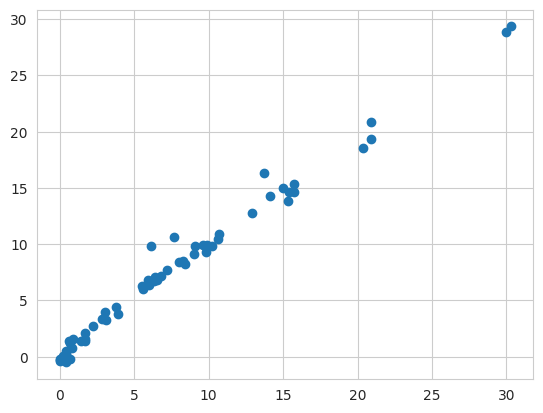

In [344]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print(f"Mean Absolute Error:{mae}\nMean Squarred Error:{mae}\nR 2 Score:{r2Score}")
plt.scatter(y_test,y_pred)

Mean Absolute Error:0.8593720006238239
Mean Squarred Error:0.8593720006238239
R 2 Score:0.9727787169723219


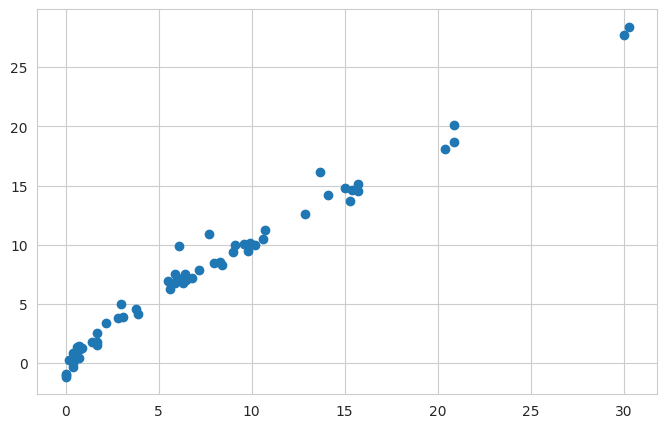

In [349]:
from sklearn.linear_model import RidgeCV
Ridge = RidgeCV(cv=10)
Ridge.fit(X_train_scaled,y_train)
y_pred = Ridge.predict(X_test_scaled)
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print(f"Mean Absolute Error:{mae}\nMean Squarred Error:{mae}\nR 2 Score:{r2Score}")

In [350]:
Ridge.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 10,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean Absolute Error:1.890760446719498
Mean Squarred Error:1.890760446719498
R 2 Score:0.8732832242877046


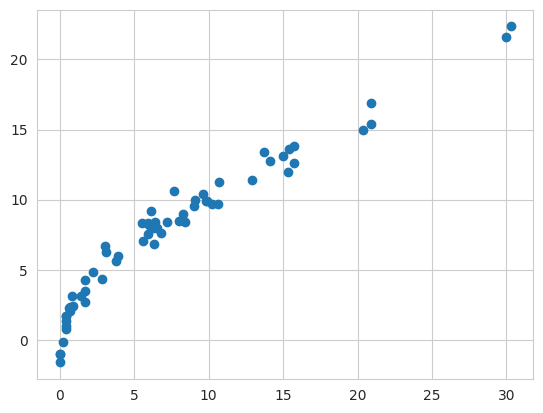

In [354]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print(f"Mean Absolute Error:{mae}\nMean Squarred Error:{mae}\nR 2 Score:{r2Score}")

Mean Absolute Error:0.7313821960334402
Mean Squarred Error:0.7313821960334402
R 2 Score:0.9788180216935684


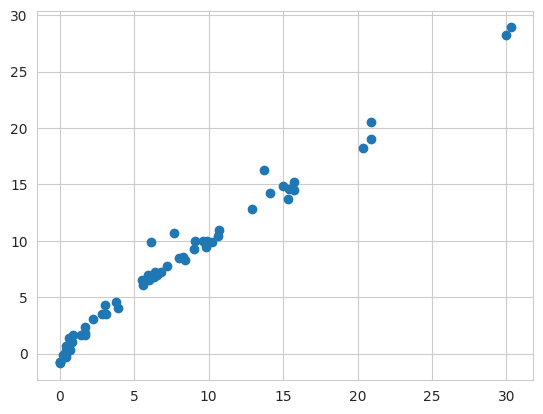

In [356]:
from sklearn.linear_model import ElasticNetCV
ECV = ElasticNetCV(cv=5)
ECV.fit(X_train_scaled,y_train)
y_pred = ECV.predict(X_test_scaled)
mae =mean_absolute_error(y_test,y_pred)
mse = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print(f"Mean Absolute Error:{mae}\nMean Squarred Error:{mae}\nR 2 Score:{r2Score}")
plt.scatter(y_test,y_pred)

In [357]:
ECV.alpha_

np.float64(0.04551001057030384)

In [358]:
ECV.alphas_

array([13.89809965, 12.96141425, 12.08785831, 11.27317711, 10.51340271,
        9.80483455,  9.14402152,  8.52774507,  7.9530036 ,  7.41699777,
        6.91711695,  6.45092641,  6.01615556,  5.61068681,  5.2325453 ,
        4.87988926,  4.55100106,  4.24427882,  3.95822863,  3.69145727,
        3.4426654 ,  3.21064128,  2.9942548 ,  2.79245205,  2.60425013,
        2.42873238,  2.26504395,  2.11238757,  1.97001972,  1.83724698,
        1.71342268,  1.59794373,  1.49024767,  1.38980996,  1.29614142,
        1.20878583,  1.12731771,  1.05134027,  0.98048346,  0.91440215,
        0.85277451,  0.79530036,  0.74169978,  0.69171169,  0.64509264,
        0.60161556,  0.56106868,  0.52325453,  0.48798893,  0.45510011,
        0.42442788,  0.39582286,  0.36914573,  0.34426654,  0.32106413,
        0.29942548,  0.2792452 ,  0.26042501,  0.24287324,  0.2265044 ,
        0.21123876,  0.19700197,  0.1837247 ,  0.17134227,  0.15979437,
        0.14902477,  0.138981  ,  0.12961414,  0.12087858,  0.11